In [ ]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"chenyixing","key":"c8ac8c678d1831869eea3a076a63ea07"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
 
!kaggle competitions download -c dog-vs-cat-classification


 99% 709M/718M [00:06<00:00, 125MB/s]
100% 718M/718M [00:06<00:00, 119MB/s]


In [ ]:
!unzip /content/dog-vs-cat-classification.zip

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: train/train/dogs/dog.5499.jpg  
  inflating: train/train/dogs/dog.55.jpg  
  inflating: train/train/dogs/dog.550.jpg  
  inflating: train/train/dogs/dog.5500.jpg  
  inflating: train/train/dogs/dog.5501.jpg  
  inflating: train/train/dogs/dog.5502.jpg  
  inflating: train/train/dogs/dog.5503.jpg  
  inflating: train/train/dogs/dog.5504.jpg  
  inflating: train/train/dogs/dog.5505.jpg  
  inflating: train/train/dogs/dog.5506.jpg  
  inflating: train/train/dogs/dog.5507.jpg  
  inflating: train/train/dogs/dog.5508.jpg  
  inflating: train/train/dogs/dog.5509.jpg  
  inflating: train/train/dogs/dog.551.jpg  
  inflating: train/train/dogs/dog.5510.jpg  
  inflating: train/train/dogs/dog.5511.jpg  
  inflating: train/train/dogs/dog.5512.jpg  
  inflating: train/train/dogs/dog.5513.jpg  
  inflating: train/train/dogs/dog.5514.jpg  
  inflating: train/train/dogs/dog.5515.jpg  
  inflating: train/train/dogs/dog.5516.jpg  
  inflating: train/train/dogs/do

In [ ]:
import os,shutil
original_dataset_dir='/content/train/train'
base_dir='/content/cats_and_dogs_samll'
os.mkdir(base_dir)
os.system('chmod 777 '+base_dir)

train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir=os.path.join(train_dir,'cat')
os.mkdir(train_cats_dir)

train_dogs_dir=os.path.join(train_dir,'dog')
os.mkdir(train_dogs_dir)

validation_cats_dir=os.path.join(validation_dir,'cat')
os.mkdir(validation_cats_dir)

validation_dogs_dir=os.path.join(validation_dir,'dog')
os.mkdir(validation_dogs_dir)

test_cats_dir=os.path.join(test_dir,'cat')
os.mkdir(test_cats_dir)

test_dogs_dir=os.path.join(test_dir,'dog')
os.mkdir(test_dogs_dir)

fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir+'/cats/',fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir+'/cats/',fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir+'/cats/',fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir+'/dogs/',fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir+'/dogs/',fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir+'/dogs/',fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst) 

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from keras import  layers
from keras import  models

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from tensorflow import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=["acc"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
#将图片导入
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch,labels_batch in train_generator:
  print('data batch shape:',data_batch.shape)
  print('labels batch shape:',labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 26s 115ms/step - loss: 0.6891 - acc: 0.5360 - val_loss: 0.6724 - val_acc: 0.5670
Epoch 2/30
100/100 [==============================] - 12s 118ms/step - loss: 0.6625 - acc: 0.6000 - val_loss: 0.6997 - val_acc: 0.5390
Epoch 3/30
100/100 [==============================] - 12s 116ms/step - loss: 0.6233 - acc: 0.6505 - val_loss: 0.6331 - val_acc: 0.6360
Epoch 4/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5811 - acc: 0.6985 - val_loss: 0.6401 - val_acc: 0.6250
Epoch 5/30
100/100 [==============================] - 19s 187ms/step - loss: 0.5410 - acc: 0.7250 - val_loss: 0.6097 - val_acc: 0.6440
Epoch 6/30
100/100 [==============================] - 12s 115ms/step - loss: 0.5142 - acc: 0.7540 - val_loss: 0.6201 - val_acc: 0.6570
Epoch 7/30
100/100 [==============================] - 12s 120ms/step - loss: 0.4867 - acc: 0.7590 - val_loss: 0.5545 - val_acc: 0.7170
Epoch 8/30
100/100 [==============================] - 1

In [ ]:
model.save('cats_and_dogs_small_1.h5')

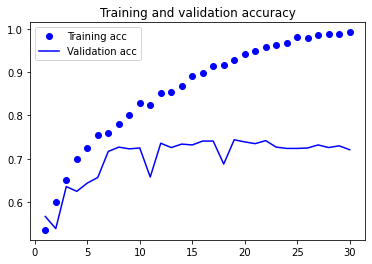

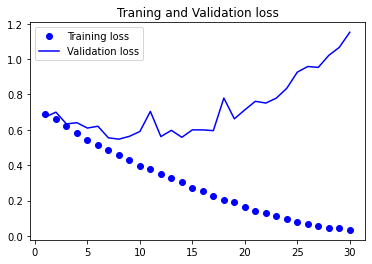

In [ ]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Traning and Validation loss')
plt.legend()
plt.show()

In [ ]:
datagen=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

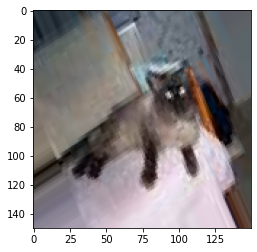

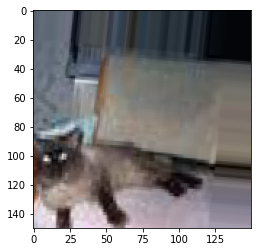

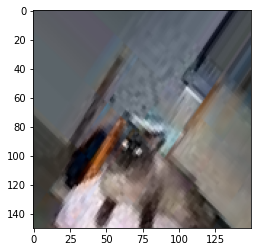

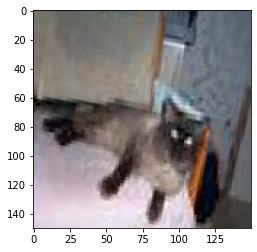

In [ ]:
from keras.preprocessing import image

fnames=[os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path=fnames[3]
img=image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)
i=0
for batch in datagen.flow(x,batch_size=1):
  plt.figure(i)
  imgplot=plt.imshow(image.array_to_img(batch[0]))
  i+=1
  if i%4==0:
    break
plt.show()


In [ ]:
#用dropout 降低过拟合
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=["acc"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
#利用数据增强生成器训练卷积神经网络
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_datagen=ImageDataGenerator(rescale=1./255)#不能增强验证集数据

train_generator2=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator2=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

history=model.fit_generator(
    train_generator2,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator2,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


100/100 [==============================] - 22s 210ms/step - loss: 0.6924 - acc: 0.5100 - val_loss: 0.6963 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 21s 208ms/step - loss: 0.6859 - acc: 0.5525 - val_loss: 0.6693 - val_acc: 0.6040
Epoch 3/100
100/100 [==============================] - 21s 208ms/step - loss: 0.6762 - acc: 0.5835 - val_loss: 0.6497 - val_acc: 0.6180
Epoch 4/100
100/100 [==============================] - 28s 276ms/step - loss: 0.6666 - acc: 0.5850 - val_loss: 0.6647 - val_acc: 0.5660
Epoch 5/100
100/100 [==============================] - 33s 326ms/step - loss: 0.6523 - acc: 0.6210 - val_loss: 0.6276 - val_acc: 0.6340
Epoch 6/100
100/100 [==============================] - 29s 289ms/step - loss: 0.6316 - acc: 0.6310 - val_loss: 0.6335 - val_acc: 0.6220
Epoch 7/100
100/100 [==============================] - 24s 244ms/step - loss: 0.6242 - acc: 0.6555 - val_loss: 0.5924 - val_acc: 0.6720
Epoch 8/100
100/100 [==============================] - 21s 2

In [ ]:
model.save('cats_and_dogs_small_2.h5')

In [ ]:
#使用预训练的卷积神经网络模型 VGG16
#两种方法 特征提取或者微调模型

from keras.applications import vgg16
conv_base=vgg16.VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
                
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
#使用数据增强
model1=models.Sequential()
model1.add(conv_base)
model1.add(layers.Flatten())
model1.add(layers.Dense(256,activation='relu'))
model1.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#在编译之前要冻结卷积基，不要让其训练好的权重改变
print("冻结之前有多少个权重:",len(model1.trainable_weights))
conv_base.trainable=False
print("冻结之后有多少个权重:",len(model1.trainable_weights))

冻结之后有多少个权重: 4


In [ ]:
#数据增强，训练模型
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_datagen=ImageDataGenerator(rescale=1./255)#不能增强验证集数据

train_generator3=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator3=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

model1.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])
history=model1.fit_generator(
    train_generator3,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator2,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
100/100 [==============================] - 31s 281ms/step - loss: 0.6097 - acc: 0.6685 - val_loss: 0.4639 - val_acc: 0.8040
Epoch 2/30
100/100 [==============================] - 27s 273ms/step - loss: 0.4867 - acc: 0.7845 - val_loss: 0.3689 - val_acc: 0.8560
Epoch 3/30
100/100 [==============================] - 28s 283ms/step - loss: 0.4426 - acc: 0.8055 - val_loss: 0.3310 - val_acc: 0.8700
Epoch 4/30
100/100 [==============================] - 34s 336ms/step - loss: 0.3891 - acc: 0.8295 - val_loss: 0.3057 - val_acc: 0.8780
Epoch 5/30
100/100 [==============================] - 33s 330ms/step - loss: 0.3728 - acc: 0.8360 - val_loss: 0.2915 - val_acc: 0.8750
Epoch 6/30
100/100 [==============================] - 34s 339ms/step - loss: 0.3654 - acc: 0.8440 - val_loss: 0.2885 - val_acc: 0.8680
Epoch 7/30
100/100 [==============================] - 35s 346ms/step - loss: 0.3576 - acc: 0.8400 - val_loss: 0.2779 - val_acc: 0.8840
Epoch 8/30
100/100 [==============================] - 2

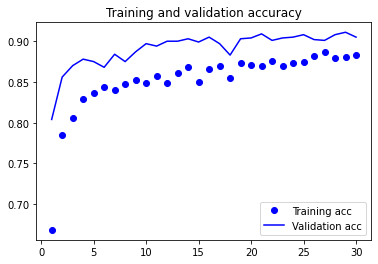

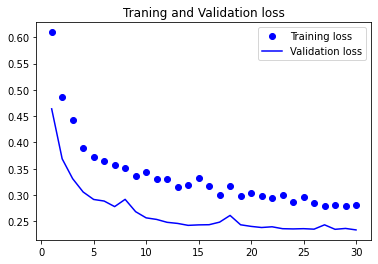

In [ ]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Traning and Validation loss')
plt.legend()
plt.show()

In [ ]:
#第二种复用模型方法 微调模型与特征提取互为补充 解冻顶部几层卷积层加入训练
conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:
  if layer.name=='block5_conv1':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

In [ ]:
#模型微调 不要让其参数改变太大
model1.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])
history=model1.fit_generator(
    train_generator3,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator2,
    validation_steps=50
)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 31s 300ms/step - loss: 0.2940 - acc: 0.8775 - val_loss: 0.2814 - val_acc: 0.8840
Epoch 2/100
100/100 [==============================] - 29s 290ms/step - loss: 0.2698 - acc: 0.8770 - val_loss: 0.2334 - val_acc: 0.9040
Epoch 3/100
100/100 [==============================] - 30s 296ms/step - loss: 0.2517 - acc: 0.8985 - val_loss: 0.2073 - val_acc: 0.9200
Epoch 4/100
100/100 [==============================] - 34s 341ms/step - loss: 0.2227 - acc: 0.9005 - val_loss: 0.2025 - val_acc: 0.9240
Epoch 5/100
100/100 [==============================] - 36s 361ms/step - loss: 0.2065 - acc: 0.9140 - val_loss: 0.1965 - val_acc: 0.9240
Epoch 6/100
100/100 [==============================] - 36s 363ms/step - loss: 0.1888 - acc: 0.9250 - val_loss: 0.2028 - val_acc: 0.9210
Epoch 7/100
100/100 [==============================] - 29s 285ms/step - loss: 0.1872 - acc: 0.9190 - val_loss: 0.1818 - val_acc: 0.9330
Epoch 8/100
100/100 [==============================] - 29s 2

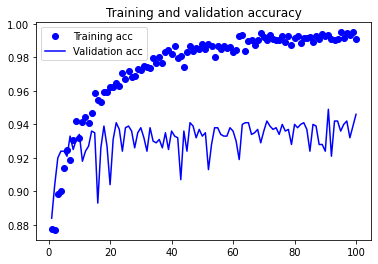

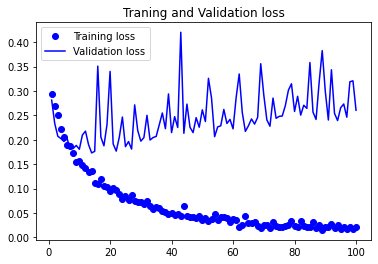

In [ ]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Traning and Validation loss')
plt.legend()
plt.show()
#图片含有噪音需要平滑化Pytho深度学习P129面

In [ ]:
#测试数据上评估
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
test_loss,test_acc=model1.evaluate_generator(test_generator,steps=50)
print('test acc:',test_acc)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


test acc: 0.9490000009536743
